<h1>Análise de dados referentes a roubos de celulares em São José dos Campos</h1>
<br>
Pesquisa realizada por <b>Gustavo Robert</b>. 
Informações cedidas pelo portal da transparência, referente aos meses de julho à outubro de 2018, acesso disponível <a href='http://www.ssp.sp.gov.br/transparenciassp/'>neste link</a> .

In [47]:
#Importação de bibliotecas
import pandas as pd
from pandas import Series, DataFrame
import folium
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [58]:
#Localização do Arquivo
path = 'datasets/'
startName = 'dataset_of_'
filenames = {'julho', 'agosto', 'setembro', 'outubro'}
extension = '.csv'

In [59]:
#População do arquivo
df = populaDataFrame()
df.reset_index()

,index,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,PLACA_VEICULO,UF_VEICULO,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR
0,0,2018,2932,2932/2018,01/09/2018 00:12,01/09/2018 00:36,31/08/2018,A NOITE,01/09/2018,01/09/2018 00:12,...,FGE0948,SP,S.PAULO,Preta,FORD/KA FLEX,2012,2012.0,AUTOMOVEL,1.0,Motorola
1,1,2018,2957,2957/2018,01/09/2018 10:10,01/09/2018 10:50,31/08/2018,A NOITE,01/09/2018,01/09/2018 10:10,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,1.0,Outros
2,2,2018,2961,2961/2018,01/09/2018 12:08,01/09/2018 12:26,31/08/2018,A TARDE,01/09/2018,01/09/2018 12:08,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,1.0,Lenovo
3,3,2018,2968,2968/2018,01/09/2018 15:26,01/09/2018 16:22,01/09/2018,DE MADRUGADA,01/09/2018,01/09/2018 15:26,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,1.0,Motorola
4,4,2018,2956,2956/2018,02/09/2018 11:46,02/09/2018 12:01,02/09/2018,DE MADRUGADA,02/09/2018,02/09/2018 11:46,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,1.0,Apple
5,5,2018,2955,2955/2018,02/09/2018 11:26,02/09/2018 12:20,02/09/2018,DE MADRUGADA,02/09/2018,02/09/2018 11:26,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,1.0,Motorola
6,6,2018,494,494/2018,03/09/2018 09:14,03/09/2018 09:41,02/09/2018,A TARDE,03/09/2018,03/09/2018 09:14,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,1.0,Asus
7,7,2018,2837,2837/2018,03/09/2018 10:23,03/09/2018 10:43,01/09/2018,A TARDE,03/09/2018,03/09/2018 10:23,...,BYT1432,SP,CACAPAVA,Cinza,HONDA/CG 150 TITAN ES,2007,2008.0,MOTOCICLO,1.0,Nokia
8,8,2018,2095,2095/2018,03/09/2018 13:45,03/09/2018 13:58,03/09/2018,PELA MANHÃ,03/09/2018,03/09/2018 13:45,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,1.0,LG
9,9,2018,827,827/2018,03/09/2018 16:31,03/09/2018 16:50,23/07/2018,A NOITE,03/09/2018,03/09/2018 16:31,...,NaN,NaN,NaN,NaN,NaN,0,0.0,NaN,1.0,Samsung


# Ranking das marcas de celulares mais roubados em São José dos Campos

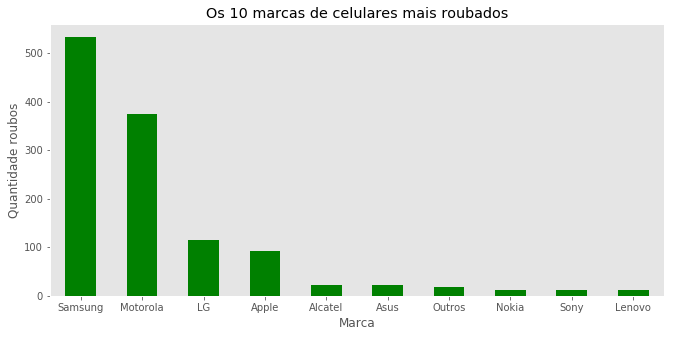

In [60]:
#Marcas de celulares mais roubados
df['MARCA_CELULAR'].value_counts().head(10).plot(kind='bar', figsize=(11,5), grid= False, rot = 0, color = 'green')

plt.title('Os 10 marcas de celulares mais roubados')
plt.xlabel('Marca')
plt.ylabel('Quantidade roubos')
plt.show()

In [62]:
df['BAIRRO'].value_counts()

CENTRO                                97
BOSQUE DOS EUCALIPTOS                 48
JARDIM MORUMBI                        39
PARQUE INDUSTRIAL                     37
AREA RURAL                            34
VISTA VERDE                           31
CAMPO DOS ALEMÃES                     26
JARDIM SATÉLITE                       24
CHÁCARAS REUNIDAS                     24
EUGÊNIO DE MELO                       21
JARDIM MOTORAMA                       18
ALTO DA PONTE                         17
CHÁCARAS HAVAÍ                        16
JARDIM ALTOS DE SANTANA               15
JARDIM TERRAS DO SUL                  13
VILA INDUSTRIAL                       12
JARDIM SANTA INÊS II                  12
JARDIM PETRÓPOLIS                     12
JARDIM ISMÊNIA                        12
VILA SANTOS                           11
JARDIM DAS INDÚSTRIAS                 11
PARQUE RESIDENCIAL UNIÃO              11
FLORADAS DE SÃO JOSÉ                  10
PQ RES NOVA CAÇAPAVA                  10
JARDIM POR DO SO

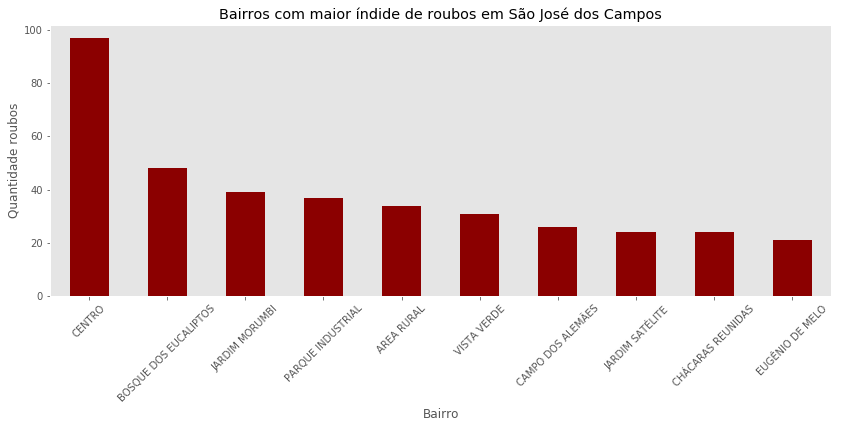

In [92]:
#Bairros com maior índide de roubos em São José dos Campos
df['BAIRRO'].value_counts().head(10).plot(kind='bar', figsize=(14,5), grid= False, rot = 45, color = 'darkred')

plt.title('Bairros com maior índide de roubos em São José dos Campos')
plt.xlabel('Bairro')
plt.ylabel('Quantidade roubos')
plt.show()

In [53]:
#Novo DataFrame para tratar os dados de latitude e longitude
geolocalizacoes = df[['LATITUDE', 'LONGITUDE']]

In [54]:
#Identificação dos resultados nulos existentes na base
geolocalizacoes.isnull().sum()

LATITUDE     220
LONGITUDE    220
dtype: int64

In [55]:
#Remoção valores nulos
geolocalizacoes.dropna(inplace=True)
#Nova validação de resultados nulos
geolocalizacoes.isnull().sum()

c:\users\gustavo robert\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


LATITUDE     0
LONGITUDE    0
dtype: int64

In [56]:
#Através da biblioteca do Folium foi criado um novo mapa e populado com as latitudes e longitudes do dataframe
coordenadas = []
lat = geolocalizacoes['LATITUDE'].values

long = geolocalizacoes['LONGITUDE'].values

mapa = folium.Map(location=[-23.1791, -45.8872],tiles='OpenStreetMap',zoom_start=12)
 
for la,lo in zip(lat,long):
    coordenadas.append([la,lo])
    
mapa.add_child(plugins.HeatMap(coordenadas))